In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./bigData/mtcars.csv')
data.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6.0,160.0,110,3.90,2.620,16.46,0,manual,4,4
1,Mazda RX4 Wag,21.0,6.0,160.0,110,3.90,2.875,17.02,0,manual,4,4
2,Datsun 710,22.8,4.0,108.0,93,3.85,2.320,18.61,1,manual,4,1
3,Hornet 4 Drive,21.4,6.0,258.0,110,3.08,3.215,0.10,1,auto,3,1
4,Hornet Sportabout,18.7,8.0,360.0,175,3.15,3.440,17.02,0,auto,3,2


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         30 non-null     float64
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        31 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     object 
 10  gear        32 non-null     object 
 11  carb        32 non-null     int64  
dtypes: float64(6), int64(3), object(3)
memory usage: 3.1+ KB


In [4]:
data.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,carb
mpg,1.000000,-0.460227,-0.847551,-0.776168,0.681172,-0.867659,0.013668,0.664039,-0.550925
cyl,-0.460227,1.000000,0.544876,0.323293,-0.372671,0.533690,-0.012755,-0.323960,0.239980
disp,-0.847551,0.544876,1.000000,0.790949,-0.710214,0.887980,0.181810,-0.710416,0.394977
hp,-0.776168,0.323293,0.790949,1.000000,-0.448759,0.658748,0.010807,-0.723097,0.749812
drat,0.681172,-0.372671,-0.710214,-0.448759,1.000000,-0.712441,-0.120283,0.440278,-0.090790
wt,-0.867659,0.533690,0.887980,0.658748,-0.712441,1.000000,0.093900,-0.554916,0.427606
qsec,0.013668,-0.012755,0.181810,0.010807,-0.120283,0.093900,1.000000,-0.112146,-0.120312
vs,0.664039,-0.323960,-0.710416,-0.723097,0.440278,-0.554916,-0.112146,1.000000,-0.569607
carb,-0.550925,0.239980,0.394977,0.749812,-0.090790,0.427606,-0.120312,-0.569607,1.000000


<AxesSubplot:>

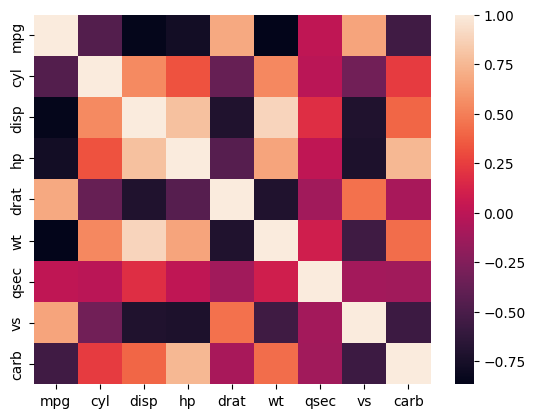

In [5]:
sns.heatmap(data.corr())

In [6]:
X = data.drop(columns='mpg')
Y = data['mpg']

In [10]:
X = X.iloc[:,1:]

In [11]:
print(X.head())

   cyl   disp   hp  drat     wt   qsec  vs      am gear  carb
0  6.0  160.0  110  3.90  2.620  16.46   0  manual    4     4
1  6.0  160.0  110  3.90  2.875  17.02   0  manual    4     4
2  4.0  108.0   93  3.85  2.320  18.61   1  manual    4     1
3  6.0  258.0  110  3.08  3.215   0.10   1    auto    3     1
4  8.0  360.0  175  3.15  3.440  17.02   0    auto    3     2


In [12]:
X.isnull().sum()

cyl     2
disp    0
hp      0
drat    0
wt      0
qsec    1
vs      0
am      0
gear    0
carb    0
dtype: int64

In [13]:
X.columns

Index(['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb'], dtype='object')

In [16]:
X['cyl'] =X['cyl'].fillna(X['cyl'].mean())

In [17]:
X.isnull().sum()

cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    1
vs      0
am      0
gear    0
carb    0
dtype: int64

In [18]:
X['qsec'] = X['qsec'].fillna(X['qsec'].median())

In [19]:
X.isnull().sum()

cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

In [20]:
print(X['gear'].unique())

['4' '3' '*3' '5' '*5']


In [21]:
X['gear'] = X['gear'].replace('*3', '3').replace('*5','5')

In [22]:
print(X['gear'].unique())

['4' '3' '5']


In [23]:
X.describe()

,cyl,disp,hp,drat,wt,qsec,vs,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,7.600000,230.721875,146.687500,3.596563,3.217250,19.795938,0.437500,2.8125
std,7.925459,123.938694,68.562868,0.534679,0.978457,15.066831,0.504016,1.6152
min,4.000000,71.100000,52.000000,2.760000,1.513000,0.100000,0.000000,1.0000
25%,4.000000,120.825000,96.500000,3.080000,2.581250,16.827500,0.000000,2.0000
50%,6.000000,196.300000,123.000000,3.695000,3.325000,17.600000,0.000000,2.0000
75%,8.000000,326.000000,180.000000,3.920000,3.610000,18.682500,1.000000,4.0000
max,50.000000,472.000000,335.000000,4.930000,5.424000,100.000000,1.000000,8.0000
